In [22]:
class BaseSalary:
    
    def __init__(self, base_salary, bonus_rate =0.1, symbol = "$" ):
        
        self.base_salary = base_salary
        self.bonus_rate = bonus_rate
        self.symbol = symbol
        
    def __repr__(self):
        return f"{self.symbol}{self.base_salary:,.0f}"
    
    def calculate_salary(base_salary, bonus_rate =.1):
        return base_salary * (1 + bonus_rate)
    
    def calculate_bonus(total_salary, base_salary):
        return(total_salary - base_salary) / base_salary

In [23]:
salary = BaseSalary(100000)

salary

$100,000

In [31]:
import random

salaryList = [random.randint(50000, 100000) for x in range(1000000)]


In [29]:
import numpy as np

In [33]:
myArray = np.array([1,2,3,4])

In [35]:
print(myArray.mean()
)

2.5


In [37]:
from datasets import load_dataset

In [39]:
dataset = load_dataset('lukebarousse/data_jobs')

In [56]:
df = dataset['train'].to_pandas()
df[['job_title_short', 'job_location']].iloc[90:100]

,job_title_short,job_location
90,Data Scientist,Australia
91,Data Scientist,"Temuco, Chile"
92,Data Engineer,Anywhere
93,Data Analyst,Anywhere
94,Data Engineer,"Lehi, UT"
95,Data Engineer,"Mumbai, Maharashtra, India"
96,Data Engineer,"Torrance, CA"
97,Data Analyst,United Kingdom
98,Senior Data Engineer,"Toronto, ON, Canada"
99,Data Engineer,"Miami, FL"


In [58]:
df.job_title_short.unique()

array(['Senior Data Engineer', 'Data Analyst', 'Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Cloud Engineer', 'Senior Data Scientist',
       'Software Engineer'], dtype=object)

In [65]:
df[(df.job_title_short == 'Data Analyst') & (df.salary_year_avg > 100000)]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"['sql', 'word', 'excel', 'visio', 'powerpoint'...","{'analyst_tools': ['word', 'excel', 'visio', '..."
1555,Data Analyst,Data Analyst/Engineer (M/F/D),"Aveiro, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-04-25 13:27:25,False,False,Portugal,year,111175.0,NaN,Bosch Group,"['databricks', 'spark']","{'cloud': ['databricks'], 'libraries': ['spark']}"
1681,Data Analyst,Data Analyst,"Irvine, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-03-23 13:01:14,False,True,United States,year,111175.0,NaN,Western Digital,"['sql', 'tableau', 'power bi', 'excel']","{'analyst_tools': ['tableau', 'power bi', 'exc..."
1684,Data Analyst,Data Analyst - Data17829,"Tampa, FL",via Indeed,Full-time,False,"Florida, United States",2023-07-18 13:02:09,True,True,United States,year,120000.0,NaN,Acrisure,"['shell', 'sql', 'azure', 'databricks', 'linux']","{'cloud': ['azure', 'databricks'], 'os': ['lin..."
1867,Data Analyst,Data Integration Analyst (West Coast/Chicago),"Chicago, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-07-18 13:01:47,False,False,United States,year,101500.0,NaN,Forsta,"['php', 'python', 'express']","{'programming': ['php', 'python'], 'webframewo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","['sql', 'r', 'python', 'hadoop', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,['unix'],{'os': ['unix']}
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,"['power bi', 'tableau']","{'analyst_tools': ['power bi', 'tableau']}"
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,"['sql', 'python', 'r', 'looker']","{'analyst_tools': ['looker'], 'programming': [..."


In [1]:
#Import LIBRARIES
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
from adjustText import adjust_text
import seaborn as sns
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data clean up

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply( lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_US= df[
    (df['job_country']== 'United States')].dropna(subset='salary_year_avg').copy()

(0.0, 170000.0)

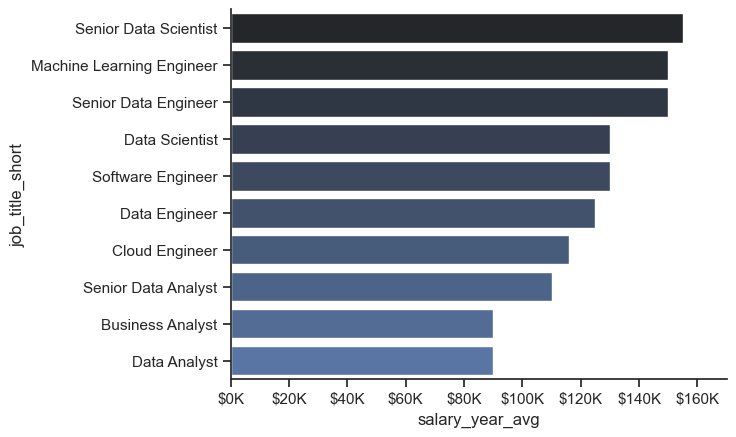

In [24]:
median_salary = df_US.groupby('job_title_short')['salary_year_avg'].median().reset_index().head(10)
median_salary=median_salary.sort_values(by='salary_year_avg', ascending=False)


sns.set_theme(style='ticks')
sns.barplot(data=median_salary, x='salary_year_avg', y='job_title_short', hue='job_title_short', palette='dark:b')
sns.despine()
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.xlim(0, 170000)
